<a href="https://colab.research.google.com/github/simpson-says/buildweek3-simpsons-says-ds/blob/aapte/Simpsons_Writes_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# 4/LwEQcM6D81qSLiqZZqa3OCLVUXWZ6e84wtuyzzuELA34r6hQYubreFI

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/My Drive/data/simpsons_script_lines.csv', warn_bad_lines=False, error_bad_lines=False)

# content/drive/My Drive/data/simpsons_script_lines.csv

df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0


In [4]:
df.shape

(158248, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158248 entries, 0 to 158247
Data columns (total 13 columns):
id                    158248 non-null int64
episode_id            158248 non-null int64
number                158248 non-null int64
raw_text              158248 non-null object
timestamp_in_ms       158248 non-null object
speaking_line         158248 non-null object
character_id          140727 non-null object
location_id           157841 non-null float64
raw_character_text    140726 non-null object
raw_location_text     157840 non-null object
spoken_words          132089 non-null object
normalized_text       132064 non-null object
word_count            132089 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 15.7+ MB


In [6]:
df.isnull().sum().sort_values()

id                        0
episode_id                0
number                    0
raw_text                  0
timestamp_in_ms           0
speaking_line             0
location_id             407
raw_location_text       408
character_id          17521
raw_character_text    17522
spoken_words          26159
word_count            26159
normalized_text       26184
dtype: int64

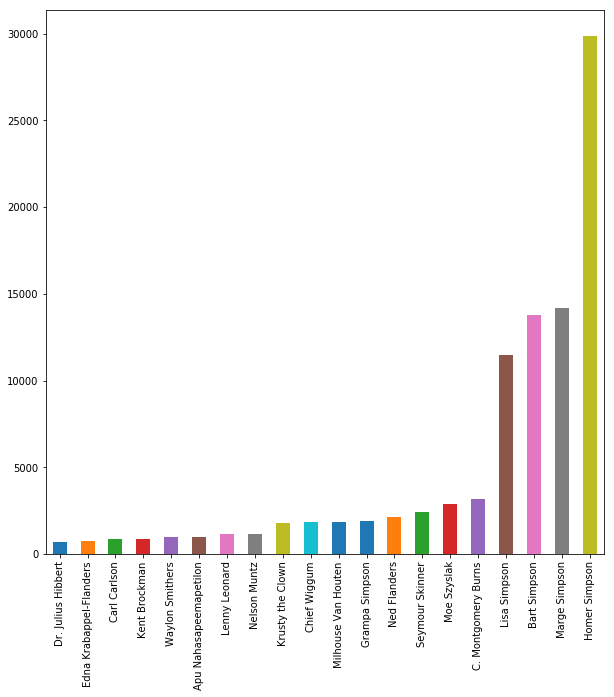

In [7]:
df.raw_character_text.value_counts(ascending =True).tail(20).plot.bar(figsize = (10,10));

In [8]:
df.describe()

,id,episode_id,number,location_id,word_count
count,158248.000000,158248.000000,158248.000000,157841.000000,132089.000000
mean,79166.825521,278.465453,141.523084,846.336142,9.887175
std,45697.771675,163.412851,83.816881,1206.870862,8.055425
min,1.000000,1.000000,0.000000,1.000000,0.000000
25%,39592.750000,138.000000,70.000000,5.000000,4.000000
50%,79160.500000,274.000000,140.000000,194.000000,8.000000
75%,118741.250000,418.000000,210.000000,1358.000000,13.000000
max,158315.000000,568.000000,394.000000,4459.000000,122.000000


In [9]:
df['character'], df['quote'] = df['raw_text'].str.split(':', 1).str

df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,character,quote
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,Miss Hoover,"No, actually, it was a little of both. Someti..."
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0,Lisa Simpson,(NEAR TEARS) Where's Mr. Bergstrom?
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0,Miss Hoover,I don't know. Although I'd sure like to talk ...
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0,Lisa Simpson,That life is worth living.
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0,Edna Krabappel-Flanders,The polls will be open from now until the end...


In [10]:
df.columns

Index(['id', 'episode_id', 'number', 'raw_text', 'timestamp_in_ms',
       'speaking_line', 'character_id', 'location_id', 'raw_character_text',
       'raw_location_text', 'spoken_words', 'normalized_text', 'word_count',
       'character', 'quote'],
      dtype='object')

In [11]:
cols = ['episode_id', 'number', 'raw_text', 
       'speaking_line', 'character_id', 'location_id', 
        'raw_character_text','raw_location_text', 'spoken_words'
       ]

df = df[cols]

df.head()

,episode_id,number,raw_text,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words
0,32,209,"Miss Hoover: No, actually, it was a little of ...",True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim..."
1,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?
2,32,211,Miss Hoover: I don't know. Although I'd sure l...,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...
3,32,212,Lisa Simpson: That life is worth living.,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.
4,32,213,Edna Krabappel-Flanders: The polls will be ope...,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...


In [12]:
df.describe()

,episode_id,number,location_id
count,158248.000000,158248.000000,157841.000000
mean,278.465453,141.523084,846.336142
std,163.412851,83.816881,1206.870862
min,1.000000,0.000000,1.000000
25%,138.000000,70.000000,5.000000
50%,274.000000,140.000000,194.000000
75%,418.000000,210.000000,1358.000000
max,568.000000,394.000000,4459.000000


In [14]:
df[df.character_id.isnull()]

,episode_id,number,raw_text,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words
8,32,217,(Apartment Building: Ext. apartment building -...,False,NaN,374.0,NaN,Apartment Building,NaN
16,32,225,(Springfield Elementary School: EXT. ELEMENTAR...,False,NaN,3.0,NaN,Springfield Elementary School,NaN
29,263,106,(Moe's Tavern: Int. Moe's - evening),False,NaN,15.0,NaN,Moe's Tavern,NaN
35,32,243,(Train Station: int. train station - afternoon),False,NaN,375.0,NaN,Train Station,NaN
56,32,264,(Simpson Home: INT. SIMPSON HOUSE - DINING ROO...,False,NaN,5.0,NaN,Simpson Home,NaN
111,33,0,(Simpson Home: int. simpson house - living roo...,False,NaN,5.0,NaN,Simpson Home,NaN
137,33,30,(Simpson Home: ext. simpson home - a little la...,False,NaN,5.0,NaN,Simpson Home,NaN
138,33,31,(Simpson Home: int. simpson HOUSE - LIVING ROOM),False,NaN,5.0,NaN,Simpson Home,NaN
180,33,72,(Simpson Car: int. simpson car - a little later),False,NaN,151.0,NaN,Simpson Car,NaN
182,33,74,(Simpson Home: int. simpson house - foyer wind...,False,NaN,5.0,NaN,Simpson Home,NaN


In [15]:
df2 = df.dropna(axis=0)

df.shape, df2.shape

((158248, 9), (131710, 9))

In [16]:
df2.head(1)

,episode_id,number,raw_text,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words
0,32,209,"Miss Hoover: No, actually, it was a little of ...",True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim..."


In [17]:
df2.isnull().sum() # No duplicates

episode_id            0
number                0
raw_text              0
speaking_line         0
character_id          0
location_id           0
raw_character_text    0
raw_location_text     0
spoken_words          0
dtype: int64

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131710 entries, 0 to 158247
Data columns (total 9 columns):
episode_id            131710 non-null int64
number                131710 non-null int64
raw_text              131710 non-null object
speaking_line         131710 non-null object
character_id          131710 non-null object
location_id           131710 non-null float64
raw_character_text    131710 non-null object
raw_location_text     131710 non-null object
spoken_words          131710 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 10.0+ MB


In [0]:
# df2.to_json('simpsons_quotes.json')

In [0]:
# from google.colab import files
# files.download('simpsons_quotes.json')

In [0]:
# df2.to_csv('simpsons_quotes.csv')

# files.download('simpsons_quotes.csv')

In [19]:
df.raw_character_text.value_counts().head(10)

Homer Simpson          29839
Marge Simpson          14157
Bart Simpson           13776
Lisa Simpson           11500
C. Montgomery Burns     3172
Moe Szyslak             2863
Seymour Skinner         2443
Ned Flanders            2145
Grampa Simpson          1886
Milhouse Van Houten     1862
Name: raw_character_text, dtype: int64

In [20]:
df2.raw_character_text.value_counts().head(10)

Homer Simpson          27844
Marge Simpson          13168
Bart Simpson           12998
Lisa Simpson           10751
C. Montgomery Burns     3087
Moe Szyslak             2807
Seymour Skinner         2387
Ned Flanders            2054
Grampa Simpson          1802
Chief Wiggum            1796
Name: raw_character_text, dtype: int64

### Generating Simpsons Quotes

https://towardsdatascience.com/how-to-generate-your-own-the-simpsons-tv-script-using-deep-learning-980337173796

In [0]:
import numpy as np
import pandas as pd
import os
import pickle
import re

from collections import Counter

from IPython.display import display

import tensorflow as tf
from tensorflow.contrib import seq2seq

**Displays Simpsons Script**

In [22]:
a = 0 # First Line
b = 50 # Last line

data_dir = '/content/drive/My Drive/data/simpsons_script_lines.csv'
input_file = os.path.join(data_dir)

clean_text = ''

with open(input_file, "r", encoding="utf8") as f:
    for line in f:
        text = re.search('[0-9]*,[0-9]*,[0-9]*,(.+?),[0-9]*', line) # parsing csv columns: 'id', 'episode_id', 'number', 'raw_text'(.+?), ''timestamp_in_ms' and beyond,    
        if text:
            text = text.group(1).replace('"', '') # Replaces trivial quotation marks
            text_parts = text.split(':') # Separates by colon
            text_parts[0] = text_parts[0].replace(' ', '_') # Places underscores on the character names in place of spaces
            text = ':'.join(text_parts) # Rejoining character with quote
            clean_text += text + '\n' # Prints script
            
# raw_text = '\n'.join(clean_text.split('\n'))

print('\n'.join(clean_text.split('\n')[a:b]))

Miss_Hoover: No
Lisa_Simpson: (NEAR TEARS) Where's Mr. Bergstrom?
Miss_Hoover: I don't know. Although I'd sure like to talk to him. He didn't touch my lesson plan. What did he teach you?
Lisa_Simpson: That life is worth living.
Edna_Krabappel-Flanders: The polls will be open from now until the end of recess. Now
Martin_Prince: (HOARSE WHISPER) I don't think there's anything left to say.
Edna_Krabappel-Flanders: Bart?
Bart_Simpson: Victory party under the slide!
(Apartment_Building: Ext. apartment building - day)
Lisa_Simpson: (CALLING) Mr. Bergstrom! Mr. Bergstrom!
Landlady: Hey
Lisa_Simpson: Do you know where I could find him?
Landlady: I think he's taking the next train to Capital City.
Lisa_Simpson: The train
Landlady: Yes
Lisa_Simpson: I see he touched you
(Springfield_Elementary_School: EXT. ELEMENTARY - SCHOOL PLAYGROUND - AFTERNOON)
Bart_Simpson: Hey
Nelson_Muntz: I didn't vote. Voting's for geeks.
Bart_Simpson: Well
Terri/sherri: We forgot.
Bart_Simpson: Well
Milhouse_Van_Houte

In [28]:
data_dir = '/content/drive/My Drive/data/simpsons_script_lines.csv'
input_file = os.path.join(data_dir)

def character_dialogue(input_file, quote_length = 3, character = 'Homer Simpson'):
    '''Returns character specific dialogue'''
    character_text = ''
    a,b = 0,10

    with open(input_file, "r", encoding="utf8") as f:
        for line in f:
            text = re.search('[0-9]*,[0-9]*,[0-9]*,(.+?),[0-9]*', line) # parsing csv columns: 'id', 'episode_id', 'number', 'raw_text'(.+?), ''timestamp_in_ms' and beyond,    
            if text:
                text = text.group(1).replace('"', '') # Replaces trivial quotation marks
                text_parts = text.split(':') # Separates by colon
                if text_parts[0] == character:
                    text_parts[0] = text_parts[0].replace(' ', '_') # Places underscores on the character names in place of spaces
                    if len(text_parts) >= quote_length:
                        text = ':'.join(text_parts) # Rejoining character with quote
                        character_text += text + '\n' # Prints script

    print('\n'.join(character_text.split('\n')[a:b]))
    return character_text


character_dialogue(input_file)

Homer_Simpson: (CASUAL SOPHISTICATED WHIMSY) So I said: I must get out of these wet clothes and into a dry martini.
Homer_Simpson: (THINKS) Hmmmm. (ANNOUNCEMENT) Gentlemen: I am going to catch General Sherman!
Homer_Simpson: I promised my boy one simple thing: Lots of riches. And that man broke my promise. Well
Homer_Simpson: So a few people won't get a few letters. Boo-hoo. You know the kinda letters people write: Dear Somebody-You-Never-Heard-Of... How is So-and-So? Blah blah blah blah blah blah blah. Yours truly
Homer_Simpson: (READING) Then I heard the sound that all Arctic explorers dread: The pitiless bark of the sea lion. (TERRIFIED) He'll be killed!
Homer_Simpson: It passed the first test: I didn't go blind.
Homer_Simpson: (FAKING IT) And YOU remember... Matthew... 21:17.
Homer_Simpson: I know! I'll do a rap. (BEAT BOX NOISE) I'M MR. PLOW AND I'M HERE TO SAY: I'M THE PLOWINGEST GUY IN THE USA / I GOT A BIG PLOW AND I MOVE A LOT OF THINGS / LIKE YOUR COW IT YOU HAVE ONE.
Homer_S

"Homer_Simpson: (CASUAL SOPHISTICATED WHIMSY) So I said: I must get out of these wet clothes and into a dry martini.\nHomer_Simpson: (THINKS) Hmmmm. (ANNOUNCEMENT) Gentlemen: I am going to catch General Sherman!\nHomer_Simpson: I promised my boy one simple thing: Lots of riches. And that man broke my promise. Well\nHomer_Simpson: So a few people won't get a few letters. Boo-hoo. You know the kinda letters people write: Dear Somebody-You-Never-Heard-Of... How is So-and-So? Blah blah blah blah blah blah blah. Yours truly\nHomer_Simpson: (READING) Then I heard the sound that all Arctic explorers dread: The pitiless bark of the sea lion. (TERRIFIED) He'll be killed!\nHomer_Simpson: It passed the first test: I didn't go blind.\nHomer_Simpson: (FAKING IT) And YOU remember... Matthew... 21:17.\nHomer_Simpson: I know! I'll do a rap. (BEAT BOX NOISE) I'M MR. PLOW AND I'M HERE TO SAY: I'M THE PLOWINGEST GUY IN THE USA / I GOT A BIG PLOW AND I MOVE A LOT OF THINGS / LIKE YOUR COW IT YOU HAVE ONE.

**Data Preprocessing**

In [0]:
from collections import Counter

tokenized_punctuation = {
    '.' : '||Period||',
    ',' : '||Comma||',
    '"' : '||Quotation_Mark||',
    ';' : '||Semicolon||',
    '!' : '||Exclamation_Mark||',
    '?' : '||Question_Mark||',
    '(' : '||Left_Parentheses||',
    ')' : '||Right_Parentheses||',
    '--' : '||Dash||',
    '\n' : '||Return||'
}

# text = "\n".join(raw_text)



In [0]:
for key, token in tokenized_punctuation.items():
    clean_text = clean_text.replace(key, ' {} '.format(token))

clean_text = clean_text.lower()
clean_text = clean_text.split()

word_counts = Counter(clean_text)
sorted_vocab = sorted(word_counts, key=word_counts.get, reverse=True)
int_to_vocab = {ii: word for ii, word in enumerate(sorted_vocab)}
vocab_to_int = {word: ii for ii, word in int_to_vocab.items()} 

int_text = [vocab_to_int[word] for word in clean_text]
pickle.dump((int_text, vocab_to_int, int_to_vocab, tokenized_punctuation), open('preprocess.p', 'wb'))

### Tensorflow

In [0]:
def get_inputs():
    input_placeholder = tf.placeholder(tf.int32, [None, None], name = 'input')
    targets_placeholder = tf.placeholder(tf.int32, [None, None])
    learning_rate_placeholder = tf.placeholder(tf.float32)
    
    return input_placeholder, targets_placeholder, learning_rate_placeholder

def get_init_cell(batch_size, rnn_size):
    lstm = tf.contrib.rnn.GRUCell(rnn_size)
    cell = tf.contrib.rnn.MultiRNNCell([lstm])
    initial_state = tf.identity(cell.zero_state(batch_size, tf.float32), name='initial_state')
    return cell, initial_state

def get_embed(input_data, vocab_size, embed_dim):
    embedding = tf.Variable(tf.random_uniform((vocab_size, embed_dim), -1, 1))
    embed = tf.nn.embedding_lookup(embedding, input_data)    
    return embed

def build_rnn(cell, inputs):
    outputs, state = tf.nn.dynamic_rnn(cell, inputs, dtype=tf.float32)
    final_state = tf.identity(state, name="final_state")
    return outputs, final_state

def build_nn(cell, rnn_size, input_data, vocab_size, embed_dim):
    embeddings = get_embed(input_data, vocab_size, embed_dim)
    inputs, final_state = build_rnn(cell, embeddings)
    logits = tf.contrib.layers.fully_connected(inputs=inputs, num_outputs=vocab_size, activation_fn=None)
    return logits, final_state

**Training NN**

In [0]:
def get_batches(int_text, batch_size, seq_length):
    n_batches = len(int_text) // (batch_size * seq_length)
    words = np.asarray(int_text[:n_batches*(batch_size * seq_length)])
    
    batches = np.zeros(shape=(n_batches, 2, batch_size, seq_length))

    input_sequences = words.reshape(-1, seq_length)
    target_sequences = np.roll(words, -1)
    target_sequences = target_sequences.reshape(-1, seq_length)
    
    for idx in range(0, input_sequences.shape[0]):
        input_idx = idx % n_batches
        target_idx = idx // n_batches
        batches[input_idx,0,target_idx,:] = input_sequences[idx,:]
        batches[input_idx,1,target_idx,:] = target_sequences[idx,:]        
    return batches

**HyperParameters**

In [0]:
# Number of Epochs
num_epochs = 25
# Batch Size
batch_size = 32
# RNN Size
rnn_size = 512
# Embedding Dimension Size
embed_dim = 256
# Sequence Length
seq_length = 16
# Learning Rate
learning_rate = 0.001
# Show stats for every n number of batches
show_every_n_batches = 200

# where to save the trained model
save_dir = './save'

In [0]:
from tensorflow.contrib import seq2seq

train_graph = tf.Graph()
with train_graph.as_default():
    vocab_size = len(int_to_vocab)
    input_text, targets, lr = get_inputs()
    input_data_shape = tf.shape(input_text)
    cell, initial_state = get_init_cell(input_data_shape[0], rnn_size)
    logits, final_state = build_nn(cell, rnn_size, input_text, vocab_size, embed_dim)

    # Probabilities for generating words
    probs = tf.nn.softmax(logits, name='probs')

    # Loss function
    cost = seq2seq.sequence_loss(
        logits,
        targets,
        tf.ones([input_data_shape[0], input_data_shape[1]]))

    # Optimizer
    optimizer = tf.train.AdamOptimizer(lr)

    # Gradient Clipping
    gradients = optimizer.compute_gradients(cost)
    capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
    train_op = optimizer.apply_gradients(capped_gradients)

In [0]:
%%time

batches = get_batches(int_text, batch_size, seq_length)

with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(num_epochs):
        state = sess.run(initial_state, {input_text: batches[0][0]}) # Runs operations and evaluates tensors in `fetches`

        for batch_i, (x, y) in enumerate(batches):
            feed = {
                input_text: x,
                targets: y,
                initial_state: state,
                lr: learning_rate}
            train_loss, state, _ = sess.run([cost, final_state, train_op], feed)

            # Show every <show_every_n_batches> batches
            if (epoch_i * len(batches) + batch_i) % show_every_n_batches == 0:
                print('Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                    epoch_i,
                    batch_i,
                    len(batches),
                    train_loss))

    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_dir)
    print('Model Trained and Saved')

Epoch   0 Batch    0/2914   train_loss = 10.776
Epoch   0 Batch  200/2914   train_loss = 6.765
Epoch   0 Batch  400/2914   train_loss = 5.568
Epoch   0 Batch  600/2914   train_loss = 5.271
Epoch   0 Batch  800/2914   train_loss = 4.768
Epoch   0 Batch 1000/2914   train_loss = 4.545
Epoch   0 Batch 1200/2914   train_loss = 4.697
Epoch   0 Batch 1400/2914   train_loss = 4.391
Epoch   0 Batch 1600/2914   train_loss = 4.177
Epoch   0 Batch 1800/2914   train_loss = 4.201
Epoch   0 Batch 2000/2914   train_loss = 4.325
Epoch   0 Batch 2200/2914   train_loss = 4.341
Epoch   0 Batch 2400/2914   train_loss = 4.288
Epoch   0 Batch 2600/2914   train_loss = 4.269
Epoch   0 Batch 2800/2914   train_loss = 4.609
Epoch   1 Batch   86/2914   train_loss = 3.805
Epoch   1 Batch  286/2914   train_loss = 4.504
Epoch   1 Batch  486/2914   train_loss = 4.131
Epoch   1 Batch  686/2914   train_loss = 4.186
Epoch   1 Batch  886/2914   train_loss = 3.913
Epoch   1 Batch 1086/2914   train_loss = 3.605
Epoch   1 Ba

**Writing The Script**

In [0]:
def get_tensors(loaded_graph):
    input_tensor = loaded_graph.get_tensor_by_name('input:0')
    initial_state_tensor = loaded_graph.get_tensor_by_name('initial_state:0')
    final_state_tensor = loaded_graph.get_tensor_by_name('final_state:0')
    probs_tensor = loaded_graph.get_tensor_by_name('probs:0')
    return input_tensor, initial_state_tensor, final_state_tensor, probs_tensor

def pick_word(probabilities, int_to_vocab):
    word_id = np.argmax(probabilities)
    word_string = int_to_vocab[word_id]
    return word_string



In [0]:
gen_length = 500

"""
The prime word is used as the start word for the text generation.
To generate different text try different prime words like:
'marge_simpson'
'bart_simpson'
'lisa_simpson'
'seymour_skinner'
'chief_wiggum'
'judge_snyder'
"""
prime_word = 'homer_simpson'

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:  # A `Session` object encapsulates the environment in which `Operation` objects are executed, and `Tensor` objects are evaluated.
    
    # Load saved model
    loader = tf.train.import_meta_graph(save_dir + '.meta')
    loader.restore(sess, save_dir)

    # Get Tensors from loaded model
    input_text, initial_state, final_state, probs = get_tensors(loaded_graph)

    # Sentences generation setup
    gen_sentences = [prime_word + ':']
    prev_state = sess.run(initial_state, {input_text: np.array([[1]])})

    # Generate sentences
    for n in range(gen_length):
        # Dynamic Input
        dyn_input = [[vocab_to_int[word] for word in gen_sentences[-seq_length:]]]
        dyn_seq_length = len(dyn_input[0])

        # Get Prediction
        probabilities, prev_state = sess.run(
            [probs, final_state],
            {input_text: dyn_input, initial_state: prev_state})
        
        pred_word = pick_word(probabilities[0][dyn_seq_length-1], int_to_vocab)

        gen_sentences.append(pred_word)
    
    # Remove tokens
    tv_script = ' '.join(gen_sentences)
    for key, token in tokenized_punctuation.items():
        ending = ' ' if key in ['\n', '(', '"'] else ''
        tv_script = tv_script.replace(' ' + token.lower(), key)
    tv_script = tv_script.replace('\n ', '\n')
    tv_script = tv_script.replace('( ', '(')
        
    print(tv_script)

INFO:tensorflow:Restoring parameters from ./save
homer_simpson:(to marge) shh! marge
marge_simpson: sting!
marge_simpson:(anguished noise)
marge_simpson:(holding a dress ago) hear you having marriage for you... i don't have a message for your damn friends.
salesman: yo sir
homer_simpson:(miserable) oh
salesman: now look
homer_simpson:(high voice) oh
(simpson_home: int. simpson house - living room - evening)
homer_simpson:(shrugging) hm
chief_wiggum:(sneaky chuckle)
apu_nahasapeemapetilon:(singing) if you don't suspect the dance somehow
(simpson_home: int. simpson house - lisa's room)
lisa_simpson: when you're wearing a costume of a feeling these flowers back in his date.
martin_prince: i want to go to the bathroom!
little_vicki:(chipper) so without lisa is always computer for me or two high moments later)
bart_simpson:(lying) uh
maude_flanders: ned
ned_flanders:(stunned) what?!
homer_simpson:(reading) the man has a tie six months
(tv_studio: int. tv studio - day)
nash_castor: head on!


### Keras

https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

#### Steps

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [0]:
# load ascii text and covert to lowercase
# filename = "wonderland.txt"
# raw_text = open(filename).read()
raw_text = raw_text.lower()

In [0]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [0]:
n_chars = len(raw_text)
n_vocab = len(chars)
print "Total Characters: ", n_chars
print "Total Vocab: ", n_vocab

In [0]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print "Total Patterns: ", n_patterns

In [0]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [0]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [0]:
model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

#### Putting it Together

In [0]:
# Entire Thing

# Small LSTM Network to Generate Text for The Simpsons
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

# load ascii text and covert to lowercase
# filename = "wonderland.txt"
# raw_text = open(filename).read()
raw_text = raw_text.lower()

# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))

# normalize
X = X / float(n_vocab)

# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fit the model
model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)